option data from http://www.cboe.com/

- https://www.historicaloptiondata.com/content/sample-files-0

- https://www.historicaloptiondata.com/content/level-3-hdfive-five-years-option-history-csv-format

- https://www.historicaloptiondata.com/content/historical-options-data-file-structures


In [11]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.dates as md
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import pandas as pd

%matplotlib inline

In [12]:
options = pd.read_csv("data/L3_optionstats_20131101.part.csv")

In [13]:
options.head()

,UnderlyingSymbol,UnderlyingPrice,Flags,OptionSymbol,Type,Expiration,DataDate,Strike,Last,Bid,...,OpenInterest,T1OpenInterest,IVMean,IVBid,IVAsk,Delta,Gamma,Theta,Vega,AKA
0,AAPL,520.03,W,AAPL131101C00355000,call,11/01/2013,11/01/2013,355,0.00,164.1,...,0,0,0,0,0,0,0,0,0,AAPL131101C00355000
1,AAPL,520.03,W,AAPL131101P00355000,put,11/01/2013,11/01/2013,355,0.01,0.0,...,195,0,0,0,0,0,0,0,0,AAPL131101P00355000
2,AAPL,520.03,W,AAPL131101C00360000,call,11/01/2013,11/01/2013,360,0.00,159.1,...,0,0,0,0,0,0,0,0,0,AAPL131101C00360000
3,AAPL,520.03,W,AAPL131101P00360000,put,11/01/2013,11/01/2013,360,0.08,0.0,...,160,0,0,0,0,0,0,0,0,AAPL131101P00360000
4,AAPL,520.03,W,AAPL131101C00365000,call,11/01/2013,11/01/2013,365,0.00,154.1,...,0,0,0,0,0,0,0,0,0,AAPL131101C00365000


In [15]:
options.loc[1]

UnderlyingSymbol                   AAPL
UnderlyingPrice                  520.03
Flags                                 W
OptionSymbol        AAPL131101P00355000
Type                                put
Expiration                   11/01/2013
 DataDate                    11/01/2013
Strike                              355
Last                               0.01
Bid                                   0
Ask                                0.01
Volume                                0
OpenInterest                        195
T1OpenInterest                        0
IVMean                                0
IVBid                                 0
IVAsk                                 0
Delta                                 0
Gamma                                 0
Theta                                 0
Vega                                  0
AKA                 AAPL131101P00355000
Name: 1, dtype: object

In [16]:
pd.unique( options['UnderlyingSymbol'] )

array(['AAPL', 'AIG', 'AMZN', 'FB', 'GE', 'GOOGL', 'JNJ', 'JPM', 'MSFT',
       'XOM'], dtype=object)

In [18]:
today = pd.datetime(2013,11,1)
#
options['Expiration'] = pd.to_datetime( options['Expiration'] )
options['T'] = (options['Expiration'] - today) / np.timedelta64(1,'Y')
#

In [33]:
subset = options[['UnderlyingSymbol','Type','Expiration','T', 'Strike','IVMean','UnderlyingPrice',' DataDate']]\
       [ (options['UnderlyingSymbol'] == 'JNJ') & (options['Type'] == 'call') & (options['Expiration'] > '2013-11-01') ] 

subset.head()

,UnderlyingSymbol,Type,Expiration,T,Strike,IVMean,UnderlyingPrice,DataDate
9002,JNJ,call,2013-11-08,0.019165,65,1.1250,93.37,11/01/2013
9004,JNJ,call,2013-11-08,0.019165,70,0.9145,93.37,11/01/2013
9006,JNJ,call,2013-11-08,0.019165,75,0.6845,93.37,11/01/2013
9008,JNJ,call,2013-11-08,0.019165,76,0.6141,93.37,11/01/2013
9010,JNJ,call,2013-11-08,0.019165,77,0.5754,93.37,11/01/2013


In [20]:
[d.strftime("%Y-%m-%d") for d in sorted(set(subset['Expiration']))]

['2013-11-08',
 '2013-11-16',
 '2013-11-22',
 '2013-11-29',
 '2013-12-06',
 '2013-12-21',
 '2014-01-18',
 '2014-04-19',
 '2015-01-17',
 '2016-01-15']

In [34]:
sorted(set(subset['T']))

[0.019165349048919554,
 0.041068605104827613,
 0.057496047146758662,
 0.076661396195678216,
 0.095826745244597764,
 0.13689535034942538,
 0.21355674654510359,
 0.4627062841810578,
 1.2101548970889204,
 2.2040151406257484]

In [35]:
def draw1(symbol, type, drawPoints=True):
    subset = options[['Expiration','Strike','IVMean','UnderlyingPrice']]\
       [ (options['UnderlyingSymbol'] == symbol) & (options['Type'] == type)] # & (options['ExpirationDT'] > '2013-11-01') ]
    expiration_dates = sorted(set(subset['Expiration']))
    price = subset.loc[subset.index[1]]['UnderlyingPrice']
    plt.figure(figsize=(12, 8))

    lines = []
    for date in expiration_dates:
        data = subset[subset.Expiration == date]
        l, = plt.plot(data['Strike'], data['IVMean'],
                 label=date.strftime("%Y-%m-%d"), lw=1.5)
        lines.append(l)
        if drawPoints:
            plt.plot(data['Strike'], data['IVMean'], 'r.')
    plt.axvline(x=price, linewidth=1, color='k')
    plt.grid(True)
    plt.xlabel('strike')
    plt.ylabel('implied volatility')
    plt.legend(handles=lines)
    plt.show()

In [36]:
def draw2(symbol, type, drawPoints=True):
    subset = options[['T', 'Strike','IVMean','UnderlyingPrice']]\
       [ (options['UnderlyingSymbol'] == symbol) & (options['Type'] == type) & (options['Expiration'] > '2013-11-01') ]
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')

    Y = subset['T']
    X = subset['Strike']
    Z = subset['IVMean']
    
    ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0.2)

    ax.set_ylabel("Expiration")
    ax.set_xlabel("Strike")
    ax.set_zlabel("Implied vol")

    plt.show()    

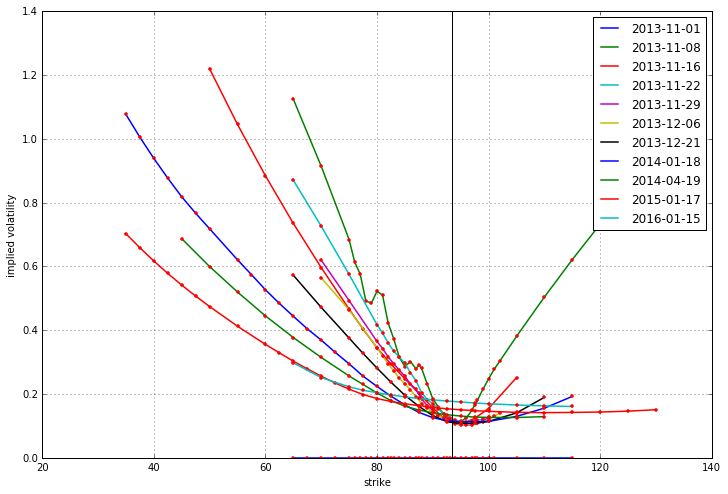

In [37]:
draw1('JNJ', 'call')

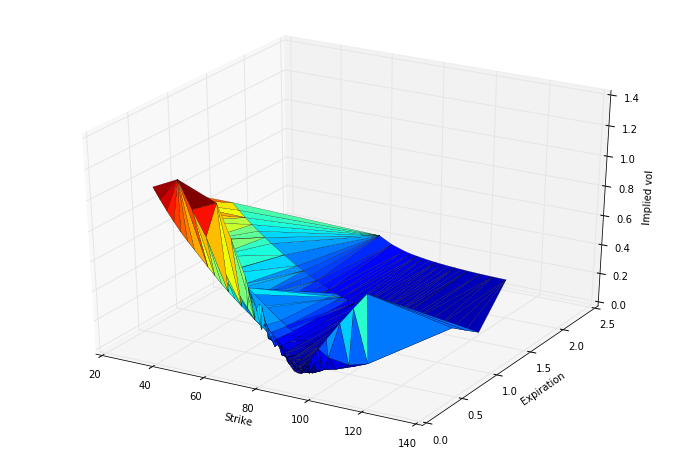

In [38]:
draw2('JNJ', 'call')

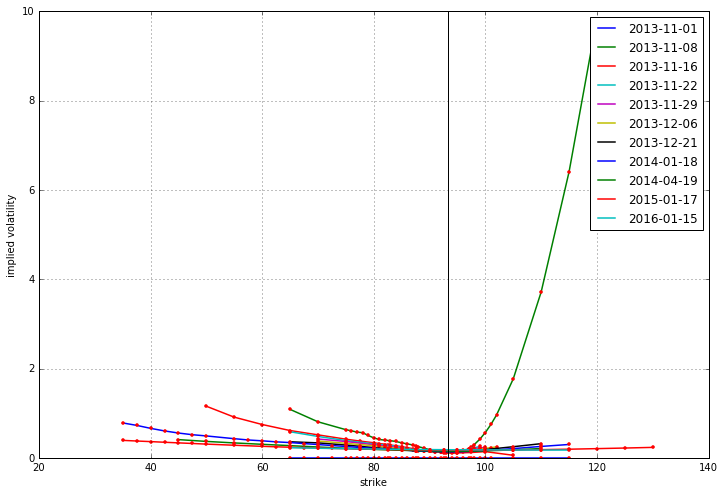

In [39]:
draw1('JNJ', 'put')

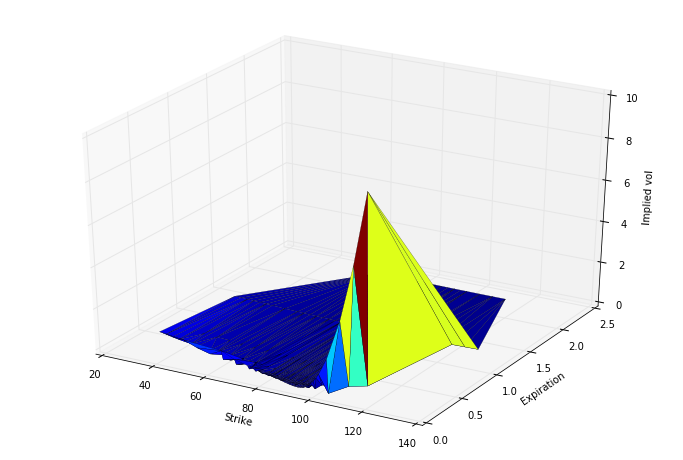

In [40]:
draw2('JNJ', 'put')

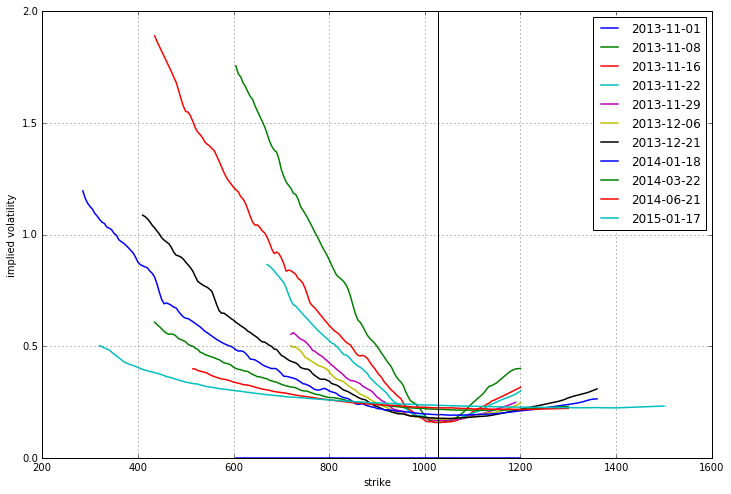

In [41]:
draw1('GOOGL', 'call', False)

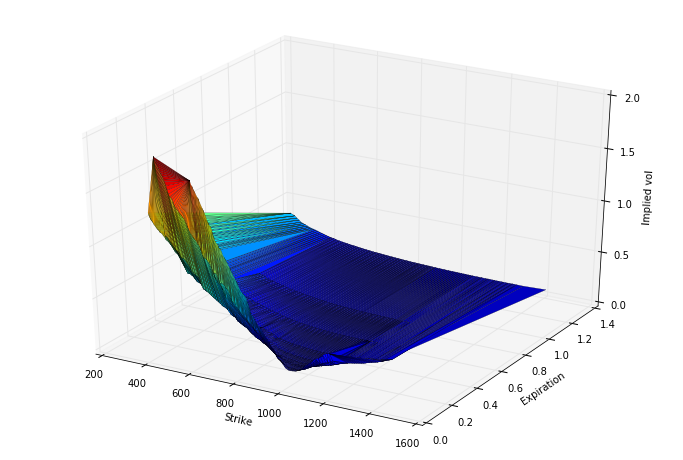

In [42]:
draw2('GOOGL', 'call', False)

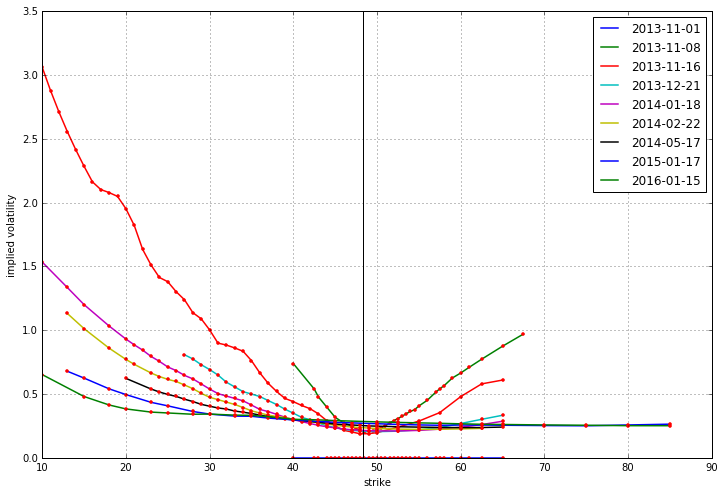

In [43]:
draw1('AIG', 'call')

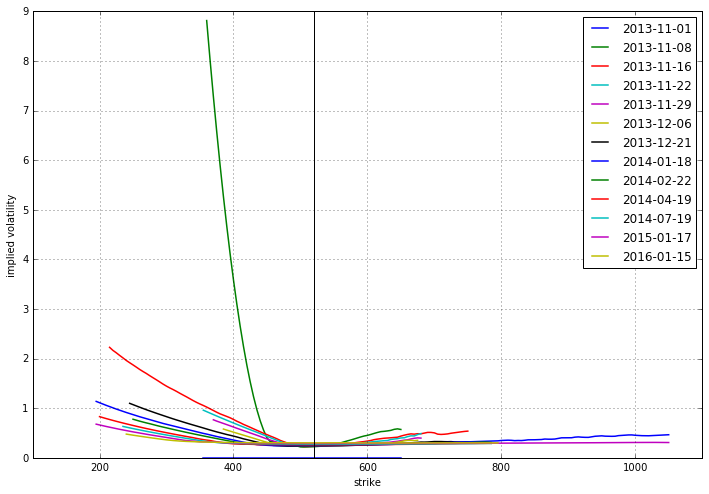

In [44]:
draw1('AAPL', 'call',False)

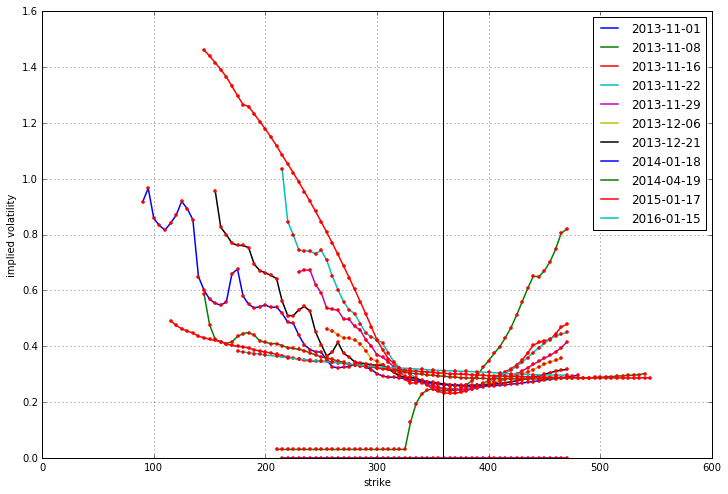

In [45]:
draw1('AMZN', 'call')

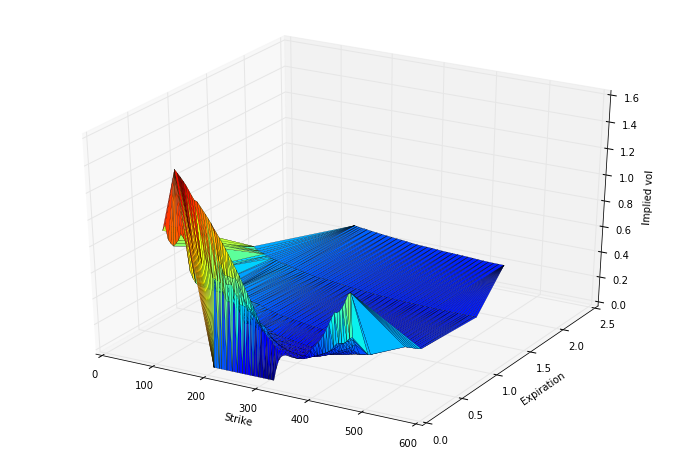

In [46]:
draw2('AMZN', 'call')

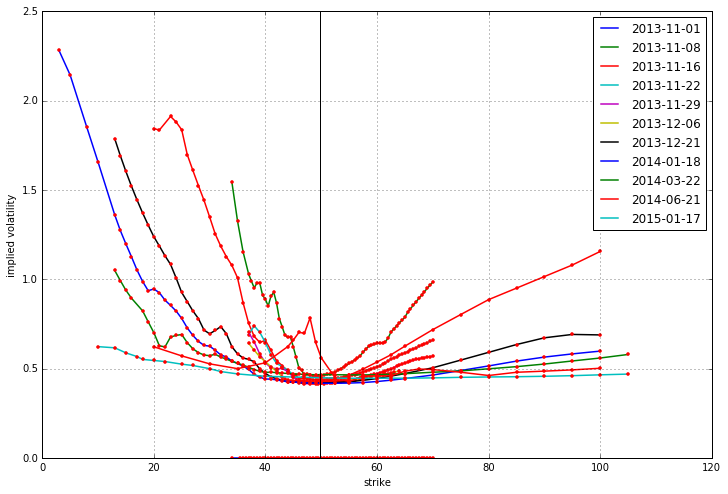

In [47]:
draw1('FB', 'call')

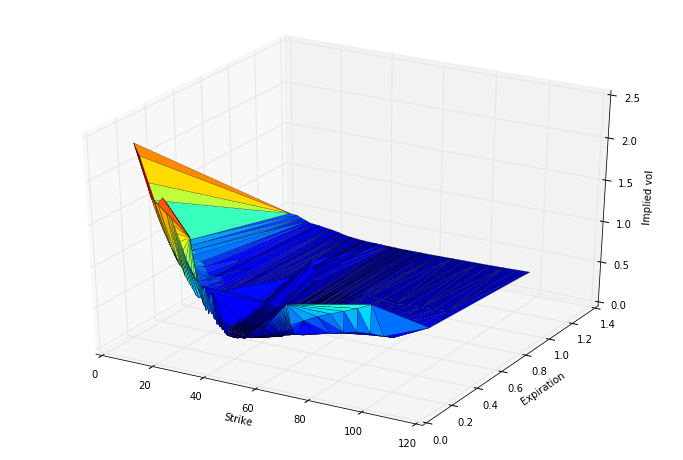

In [48]:
draw2('FB', 'call')

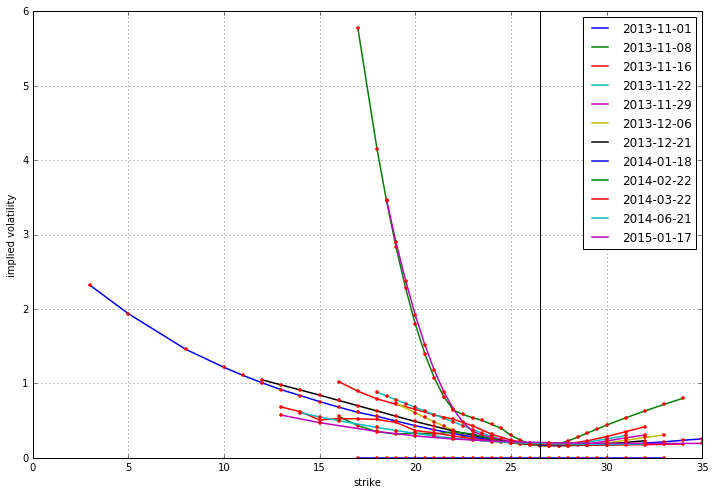

In [49]:
draw1('GE', 'call')

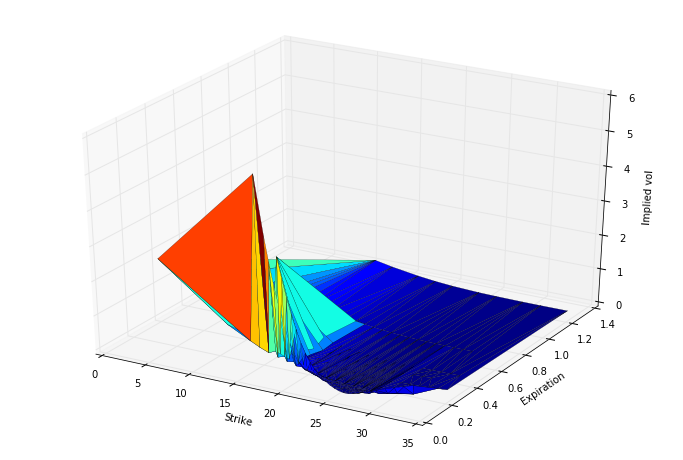

In [50]:
draw2('GE', 'call')